<a href="https://colab.research.google.com/github/sumankmaiti/All-in-one/blob/main/device_fingerprinting_trial_1_dif_res.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/dataset_and_generated_graph/different_resolution

/content/drive/MyDrive/dataset_and_generated_graph/different_resolution


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam

In [ ]:
 img = image.load_img("train_data/device0/plot0.png")

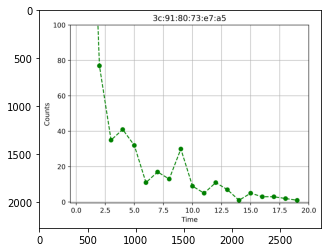

In [ ]:
plt.imshow(img)

In [ ]:
cv2.imread("train_data/device0/plot0.png").shape

(2264, 2933, 3)

In [ ]:
train = ImageDataGenerator(rescale= 1/255)
validaton = ImageDataGenerator(rescale= 1/255)

In [ ]:
train_dataset = train.flow_from_directory('train_data/', target_size=(400, 400), batch_size=16, class_mode='categorical')

Found 3626 images belonging to 9 classes.


In [ ]:
train_dataset.class_indices

{'device0': 0,
 'device1': 1,
 'device2': 2,
 'device3': 3,
 'device4': 4,
 'device5': 5,
 'device6': 6,
 'device7': 7,
 'device8': 8}

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(400, 400, 3)),
                                    tf.keras.layers.MaxPool2D(2, 2),

                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2, 2),

                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2, 2),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(9, activation='softmax'),
                                    ])

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
model.fit(train_dataset, steps_per_epoch=3, epochs=10)

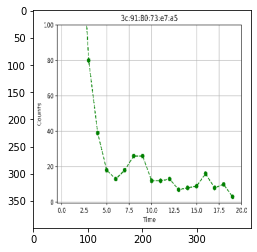

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[[1. 0. 0. 0. 0. 0. 0. 0. 0.]]


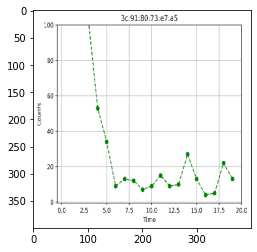

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]]


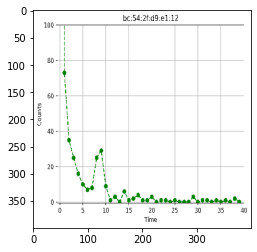

[[0. 1. 0. 0. 0. 0. 0. 0. 0.]]


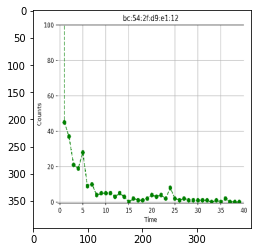

[[0. 1. 0. 0. 0. 0. 0. 0. 0.]]


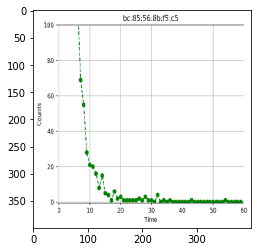

[[0. 0. 1. 0. 0. 0. 0. 0. 0.]]


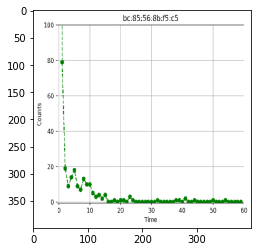

[[0. 0. 1. 0. 0. 0. 0. 0. 0.]]


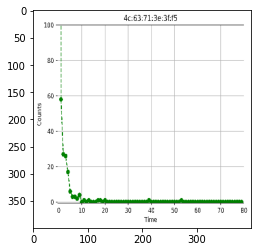

[[0. 0. 0. 1. 0. 0. 0. 0. 0.]]


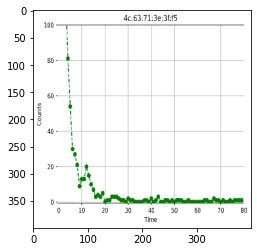

[[0. 0. 0. 1. 0. 0. 0. 0. 0.]]


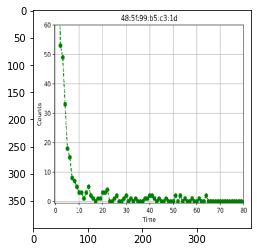

[[0. 0. 0. 0. 1. 0. 0. 0. 0.]]


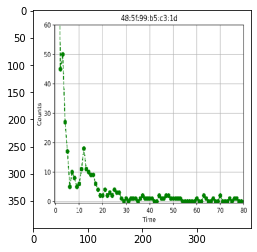

[[0. 0. 0. 0. 1. 0. 0. 0. 0.]]


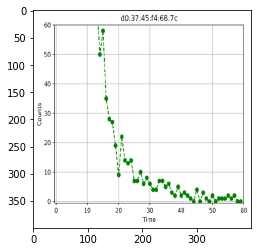

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.0000000e+00 1.1445933e-12 0.0000000e+00 0.0000000e+00]]


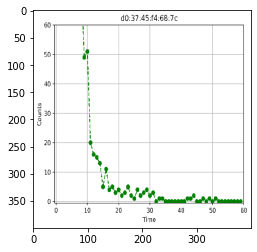

[[0. 0. 0. 0. 0. 1. 0. 0. 0.]]


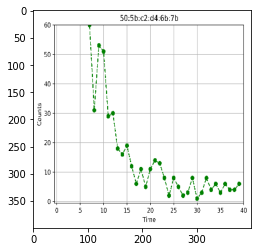

[[0. 0. 0. 0. 0. 0. 1. 0. 0.]]


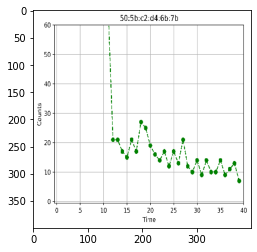

[[0. 0. 0. 0. 0. 0. 1. 0. 0.]]


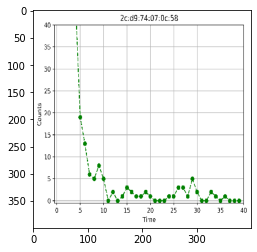

[[0. 0. 0. 0. 0. 0. 0. 1. 0.]]


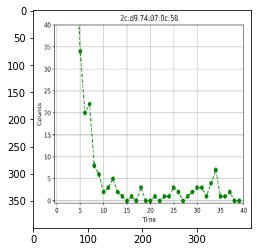

[[0. 0. 0. 0. 0. 0. 0. 1. 0.]]


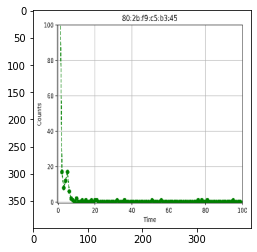

[[0. 0. 0. 0. 0. 0. 0. 0. 1.]]


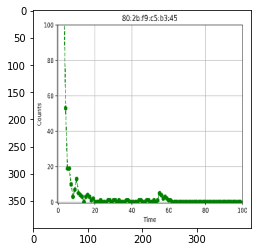

[[0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
dir_path = "test"
for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+ i, target_size=(400, 400))
  plt.imshow(img)
  plt.show()

  x= image.img_to_array(img)
  x= np.expand_dims(x, axis=0)
  images= np.vstack([x])
  val = model.predict_generator(images)
  print(val)